# FastFarmInterace: an MPI-based Python-FastFarm interface to develop wind farm control policies 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from wfcrl.environments import data_cases as cases
from wfcrl.interface import FastFarmInterface

sns.set_theme(style="darkgrid")

We start by chosing the case to simulate. The library comes with a list of pre-existing farm layouts that can be found in `environments/data_cases.py`. Let us use the `Farm6Fastfarm`, which has 6 turbines organized in 2 rows.

In [2]:
config = cases.fastfarm_ablaincourt

In [3]:
config.n_turbines

7

In [4]:
config

Wind farm simulation on FastFarm: 7 turbines
measurement_window: 200
simul_params: 
	xcoords: [484.8, 797.1, 1038.8, 1377.6, 1716.9, 2057.3, 2400.0]
	ycoords: [274.0, 251.0, 66.9, -22.7, -112.5, -195.3, -259.0]
	dt: 3

We will control the yaw of all turbines, allowing to vary between -20 and 20°, with a maximum change between two iterations of 15°. We control the pitch between 0° and 45°, with a maximum step of 1°.

In [5]:
config.n_turbines

7

In [6]:
config.simul_params

{'xcoords': [484.8, 797.1, 1038.8, 1377.6, 1716.9, 2057.3, 2400.0],
 'ycoords': [274.0, 251.0, 66.9, -22.7, -112.5, -195.3, -259.0],
 'dt': 3}

We can create the interface directly from the configuration:

In [12]:
num_iter = 100
ff_interface = FastFarmInterface.from_case(
    num_turbines=config.n_turbines,
    max_iter=num_iter,
    fast_farm_executable="simulators/fastfarm/bin/FAST.Farm_x64_OMP_2023.exe",
    measurement_window=config.measurement_window, 
    simul_params=config.simul_params,
    #output_dir="path_to_output_dir"
)

Deltas: [2.10730392e-05 5.68972057e-04 9.90432840e-04 1.60155098e-03
 2.19159607e-03 2.80271421e-03 3.41383234e-03]
Exception has been raise. I put this print statement instead. Check with EB.
Exception: Some X0_High are not on an integer multiple of the high-res grid
Created FAST.Farm input file: simulators/fastfarm/inputs/FarmInputs/Case.fstf


To change the yaw, pitch or torque command, use the method `update_command(yaw, pitch, torque)`. Let's control the yaw and pitch:

In [8]:
ff_interface.init()
for i in range(num_iter):
    print("PYTHON: Iter ", i)
    yaw_command = np.zeros(ff_interface.num_turbines, dtype=np.double)
    pitch_command = np.zeros(ff_interface.num_turbines, dtype=np.double)
    if i > 20:
        yaw_command[0] = 30
        pitch_command[0] = 1
    ff_interface.update_command(yaw=yaw_command, pitch=pitch_command)
    print(f"Iter {i} - Sent command YAW {ff_interface.get_yaw_command()} - "
          f" PITCH {ff_interface.get_pitch_command()}"
          f" TORQUE {ff_interface.get_torque_command()}\n"
          f" Received Power: {ff_interface.last_powers()}"
          f" Wind : {ff_interface.last_wind()}\n"
    )

Spawning process simulators/fastfarm/bin/FAST.Farm_x64_OMP_2023.exe example/FarmInputs/Case.fstf
Interface: will receive 12 measures at every iteration
PYTHON: Iter  0
Iter 0 - Sent command YAW [0. 0. 0. 0. 0. 0. 0.] -  PITCH [0. 0. 0. 0. 0. 0. 0.] TORQUE None
 Received Power: [[1599823.    1727455.875 1717034.    1486681.125 1738753.75  1681280.5
  1792345.5  ]] Wind : [[  8.92947006 273.77020264]]

PYTHON: Iter  1
Iter 1 - Sent command YAW [0. 0. 0. 0. 0. 0. 0.] -  PITCH [0. 0. 0. 0. 0. 0. 0.] TORQUE None
 Received Power: [[1599823.    1727455.875 1717034.    1486681.125 1738753.75  1681280.5
  1792345.5  ]
 [1647763.25  1866368.875 1843241.    1453648.5   1874914.5   1778609.125
  2001551.   ]] Wind : [[  8.92947006 273.77020264]
 [  8.92947006 273.77020264]]

PYTHON: Iter  2
Iter 2 - Sent command YAW [0. 0. 0. 0. 0. 0. 0.] -  PITCH [0. 0. 0. 0. 0. 0. 0.] TORQUE None
 Received Power: [[1647763.25  1866368.875 1843241.    1453648.5   1874914.5   1778609.125
  2001551.   ]
 [1682481.3

You can also start a simulation directly from a configuration file.

In [6]:
ff_interface = FastFarmInterface.from_file(fstf_file="simulators/fastfarm/inputs/FarmInputs/Case.fstf")

Simulation will be started from fstf file example/FarmInputs/Case.fstf
Creating new DLLs for simulation example/FarmInputs/Case.fstf


C:\Users\bizonmoc\Documents\Projects\WFCRL\wfcrl\simul_utils.py:74: UserWarning: A controler DLL already exists in C:\Users\bizonmoc\Documents\Projects\WFCRL\example\5MW_Baseline\ServoData\DISCON_WT1.dllIt will not be replaced.
  warnings.warn(f"A controler DLL already exists in {path_to_servo_dll}"
C:\Users\bizonmoc\Documents\Projects\WFCRL\wfcrl\simul_utils.py:74: UserWarning: A controler DLL already exists in C:\Users\bizonmoc\Documents\Projects\WFCRL\example\5MW_Baseline\ServoData\DISCON_WT2.dllIt will not be replaced.
  warnings.warn(f"A controler DLL already exists in {path_to_servo_dll}"
C:\Users\bizonmoc\Documents\Projects\WFCRL\wfcrl\simul_utils.py:74: UserWarning: A controler DLL already exists in C:\Users\bizonmoc\Documents\Projects\WFCRL\example\5MW_Baseline\ServoData\DISCON_WT3.dllIt will not be replaced.
  warnings.warn(f"A controler DLL already exists in {path_to_servo_dll}"
C:\Users\bizonmoc\Documents\Projects\WFCRL\wfcrl\simul_utils.py:74: UserWarning: A controler DLL 

In [7]:
ff_interface.init()
raw_measures = []
avg_wind = []
avg_powers = []
for i in range(ff_interface.max_iter):
    print("PYTHON: Iter ", i)
    yaw_command = np.zeros(ff_interface.num_turbines, dtype=np.double)
    pitch_command = np.zeros(ff_interface.num_turbines, dtype=np.double)
    if i > 20:
        yaw_command[0] = 30
        pitch_command[0] = 1
    ff_interface.update_command(yaw=yaw_command, pitch=pitch_command)
    print(f"Iter {i} - Sent command YAW {ff_interface.get_yaw_command()} - "
          f" PITCH {ff_interface.get_pitch_command()}"
          f" TORQUE {ff_interface.get_torque_command()}\n"
          f" Received Power: {ff_interface.last_powers().flatten()}"
          f" Wind : {ff_interface.last_wind().flatten()}\n"
    )
    raw_measures.append(ff_interface.get_all_measures())
    avg_powers.append(ff_interface.avg_powers())
    avg_wind.append(ff_interface.avg_wind())

Spawning process simulators/fastfarm/bin/FAST.Farm_x64_OMP_2023.exe example/FarmInputs/Case.fstf
Interface: will receive 12 measures at every iteration
PYTHON: Iter  0
Iter 0 - Sent command YAW [0. 0. 0. 0. 0. 0. 0.] -  PITCH [0. 0. 0. 0. 0. 0. 0.] TORQUE None
 Received Power: [1599823.    1727455.875 1717034.    1486681.125 1738753.75  1681280.5
 1792345.5  ] Wind : [  8.92947006 273.77020264]

PYTHON: Iter  1
Iter 1 - Sent command YAW [0. 0. 0. 0. 0. 0. 0.] -  PITCH [0. 0. 0. 0. 0. 0. 0.] TORQUE None
 Received Power: [1599823.    1727455.875 1717034.    1486681.125 1738753.75  1681280.5
 1792345.5   1647763.25  1866368.875 1843241.    1453648.5   1874914.5
 1778609.125 2001551.   ] Wind : [  8.92947006 273.77020264   8.92947006 273.77020264]

PYTHON: Iter  2
Iter 2 - Sent command YAW [0. 0. 0. 0. 0. 0. 0.] -  PITCH [0. 0. 0. 0. 0. 0. 0.] TORQUE None
 Received Power: [1647763.25  1866368.875 1843241.    1453648.5   1874914.5   1778609.125
 2001551.    1682481.375 1942895.875 1921181.2

`FastFarmInterface` automatically processes and averages measurements for `power`, `wind_speed`, and `wind_direction`, which can be accesses via the `avg_powers()}` and `avg_wind()` methods. The last method returns the wind measurements at the entrance of the farm, which includes the wind speed in m/s and the wind direction from the North in degrees. 

The history of power and wind can be accessed via the `last_powers()` and `last_wind()` methods.

In [6]:
ff_interface._measurement_window

30

By default, `avg_powers` and `avg_wind` returns the averages over the last `measurement_window` iterations. `measurement_window` is passed as an argument when creating the interface: `FastFarmInterface(..., measurement_window=30)`. Over averages can be obtained by passing another window directly in the function: `interface.avg_powers(window=50)`.

Text(0.5, 1.0, 'Wind Direction from North (°)')

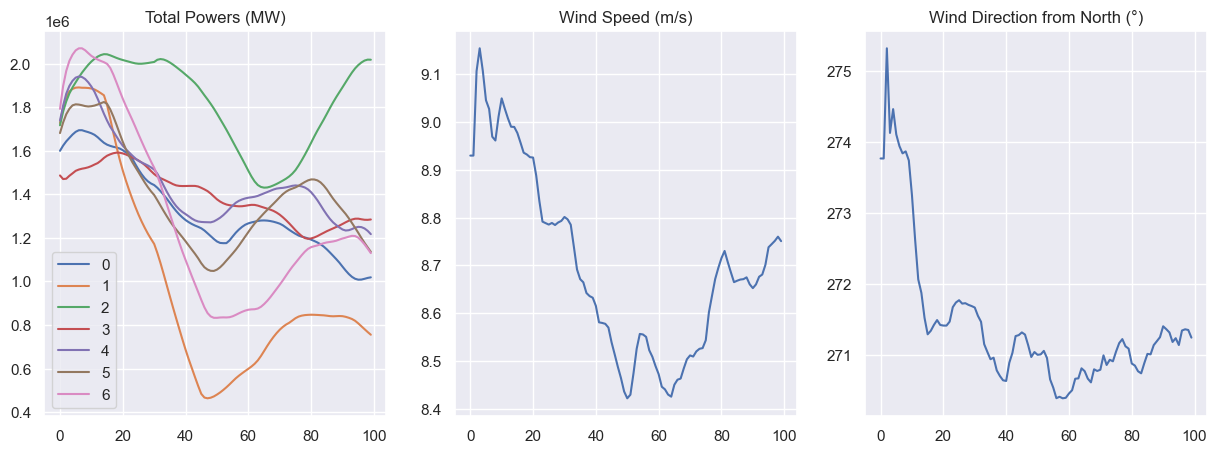

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
pd.DataFrame(avg_powers).plot(ax=ax[0])
wind_array = np.array(avg_wind)
ax[0].set_title("Total Powers (MW)")
sns.lineplot(wind_array[:, 0], ax=ax[1])
ax[1].set_title("Wind Speed (m/s)")
sns.lineplot(wind_array[:, 1]).plot(ax=ax[2])
ax[2].set_title("Wind Direction from North (°)")

Other raw measurements made during the simulation are however also available:

In [8]:
ff_interface.get_all_measures()

,wind_speed,power,wind_direction,yaw,pitch,torque,load_0,load_1,load_2,load_3,load_4,load_5
0,7.596185,1.171507e+06,-0.050277,30.002473,1.0,14467.218750,4368458.5,4271280.00,3948939.50,-2015714.375,-4.671629e+05,3.805186e+06
1,5.588076,5.810166e+05,-16.816095,-0.000707,0.0,7837.758789,2581453.0,3727373.00,3340198.25,2227814.000,-3.266444e+06,1.766953e+06
2,8.593788,1.903539e+06,-0.196673,-0.000831,0.0,21217.171875,5162984.0,5577615.50,5934438.00,2090662.125,-3.011708e+06,2.842994e+06
3,7.591425,1.248044e+06,1.587645,-0.006900,0.0,15231.755859,4899219.0,4768618.50,5533688.50,3924351.500,-2.007121e+06,-4.938662e+05
4,7.331653,1.090076e+06,-6.747814,0.004350,0.0,13618.250000,4855189.5,2949863.75,5203303.00,2263334.500,-3.422162e+06,2.427943e+06
5,7.175570,1.056140e+06,4.793448,-0.002048,0.0,13226.244141,3737767.5,4796015.00,4179600.50,-1663981.000,4.188694e+06,-1.268095e+06
6,5.574487,7.077209e+05,-1.189681,0.000739,0.0,9346.401367,4626462.0,2057240.75,3271348.75,3706961.500,-2.950412e+06,9.941938e+04


For 44 iterations, every turbine has returned 12 measures. Let's plot them:

In [10]:
df = pd.concat(raw_measures)
df["iter"] = np.arange(df.shape[0]) // ff_interface.num_turbines
df["turbine"] = df.index
df.head()

,wind_speed,power,wind_direction,yaw,pitch,torque,load_0,load_1,load_2,load_3,load_4,load_5,iter,turbine
0,8.387740,1599823.000,-5.223643,0.002079,0.0,18867.123047,4824389.5,5286907.5,6181076.0,1231454.875,-2702366.25,3248948.75,0,0
1,8.353300,1727455.875,1.645311,0.004481,0.0,19888.312500,5618536.0,5587036.5,6817447.5,1239674.000,-2725116.25,3398676.75,0,1
2,8.135091,1717034.000,-0.961345,0.000149,0.0,19796.775391,5473242.0,5957356.0,6464664.5,1283720.125,-2665204.75,3319771.50,0,2
3,8.126786,1486681.125,-2.132568,0.002177,0.0,17809.740234,4356472.0,4887527.0,5877812.5,1290568.875,-2824523.75,3206634.50,0,3
4,8.477311,1738753.750,-6.011731,-0.003945,0.0,19962.347656,5629904.0,6556508.5,6267184.5,1122254.125,-2416670.50,3177697.50,0,4


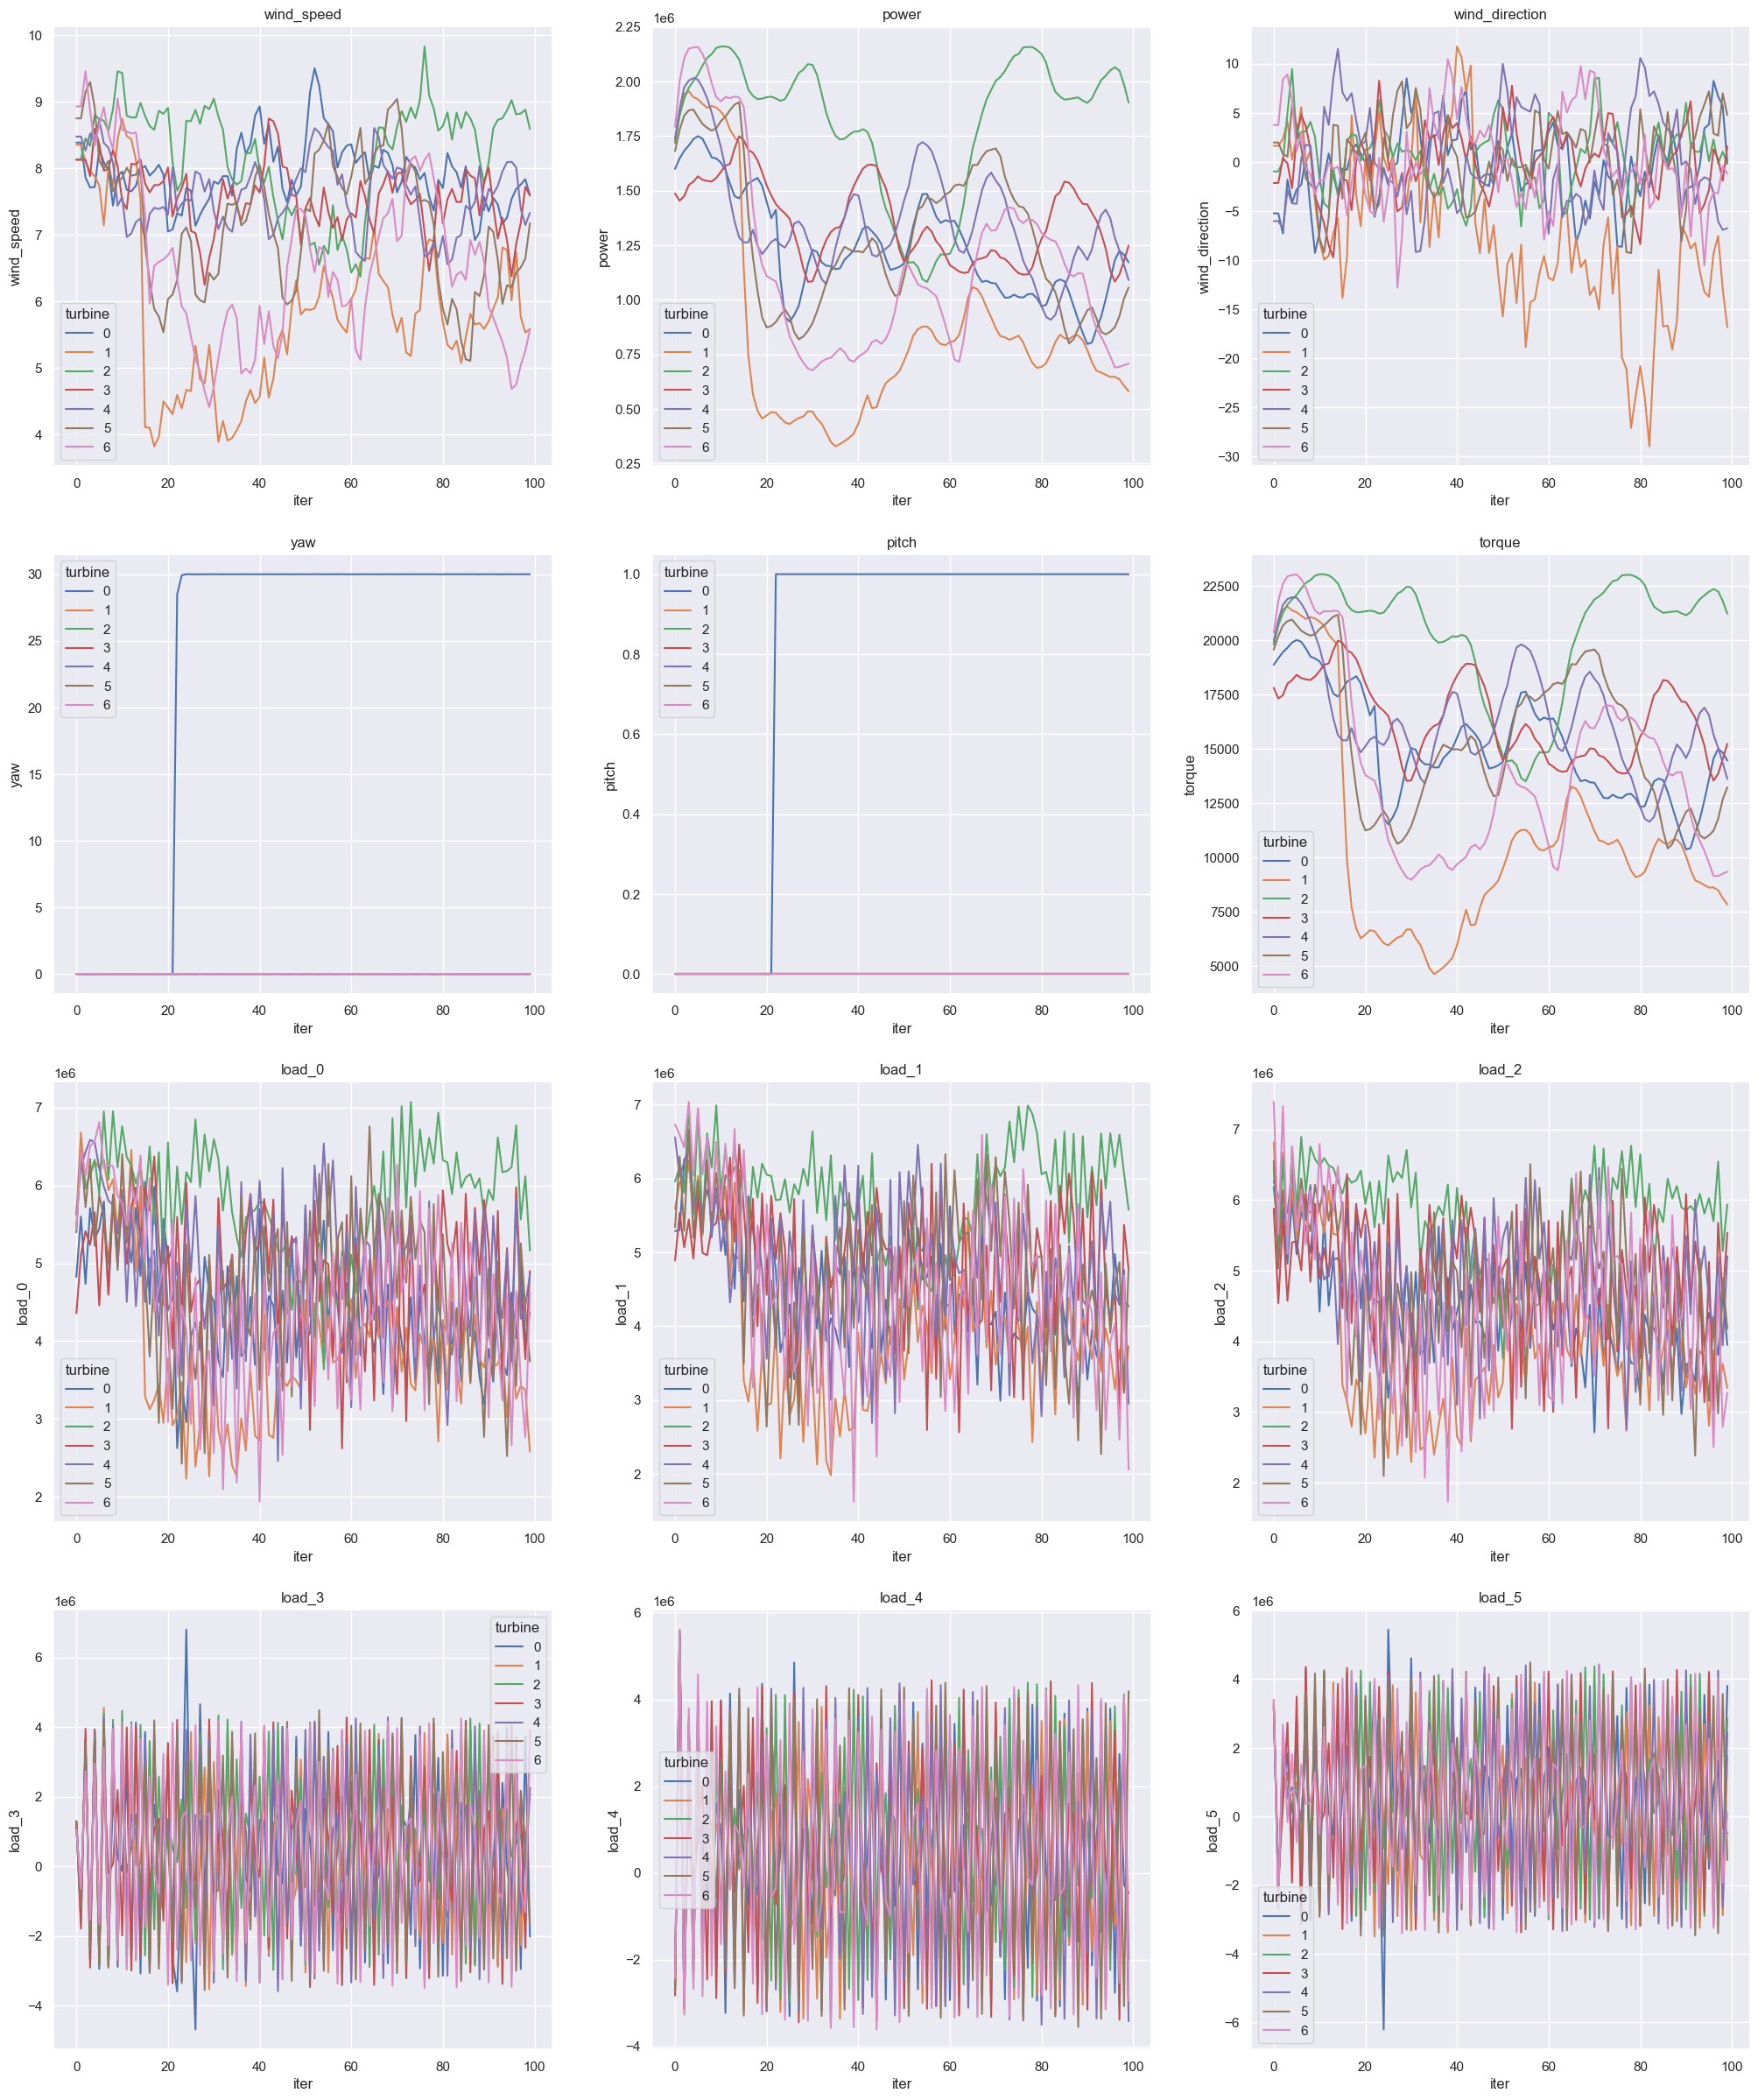

In [11]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(25,30))
for axitem, name in zip(ax.flatten(), df.columns):
    sns.lineplot(df, x="iter", y=name, hue="turbine", ax=axitem, palette="deep")
    axitem.set_title(name)